# Fig 2A

In [1]:
library(ggplot2)
library(patchwork)

In [2]:
DAYS = c("D0", "D2", "D4", "D6", "D8", "D10", "D12", "D14", "iPSC")

## Load Subfigs

In [3]:
# OSKM Expression
OCT4_expr = readRDS("./subfigs/20211003_POU5F1_expr_sc.rds")
SOX2_expr = readRDS("./subfigs/20211003_SOX2_expr_sc.rds")
KLF4_expr = readRDS("./subfigs/20211003_KLF4_expr_sc.rds")
MYC_expr = readRDS("./subfigs/20211003_MYC_expr_sc.rds")

In [4]:
# OSKM ChromVAR
OCT4_cv = readRDS("./subfigs/20211003_POU5F1_chromvar.rds")
SOX2_cv = readRDS("./subfigs/20211003_SOX2_chromvar.rds")
KLF4_cv = readRDS("./subfigs/20211003_KLF4_chromvar.rds")
MYC_cv = readRDS("./subfigs/20211003_MYC_chromvar.rds")

## Assemble Components

In [8]:
horizontal_spacers <- function(plot, widths=c(0,1,0)) {
    wrap_plots(plot_spacer(), plot, plot_spacer(), widths=widths)
}

vertical_spacers <- function(plot, heights=c(0,1,0)) {
    wrap_plots(plot_spacer(), plot, plot_spacer(), ncol=1, heights=heights)
}

placeholder_plot <- function(text, size=1) {
    df = data.frame(x=c(0), y=c(0), t=c(text))
    ggplot(df)+
    geom_text(aes(x=x,y=y,label=t), size=size)+
    theme_void()+
    theme(panel.border = element_rect(colour = "black", fill=NA, size=0.5),
                                                       plot.margin = unit(c(0,0,0,0), "pt"))
}

### OSKM Expr + ChromVAR

In [9]:
expr_to_cv_ratio = c(5,6)

In [10]:
O_plots = wrap_plots(OCT4_expr, 
                     OCT4_cv,
                     heights=expr_to_cv_ratio)

S_plots = wrap_plots(SOX2_expr,
                     SOX2_cv,
                     heights=expr_to_cv_ratio)

K_plots = wrap_plots(KLF4_expr,
                    KLF4_cv,
                    heights=expr_to_cv_ratio)

M_plots = wrap_plots(MYC_expr,
                    MYC_cv,
                    heights=expr_to_cv_ratio)

# y padding
expr_cv = wrap_plots(O_plots,
                     S_plots,
                     K_plots,
                     M_plots,
                     nrow=1)

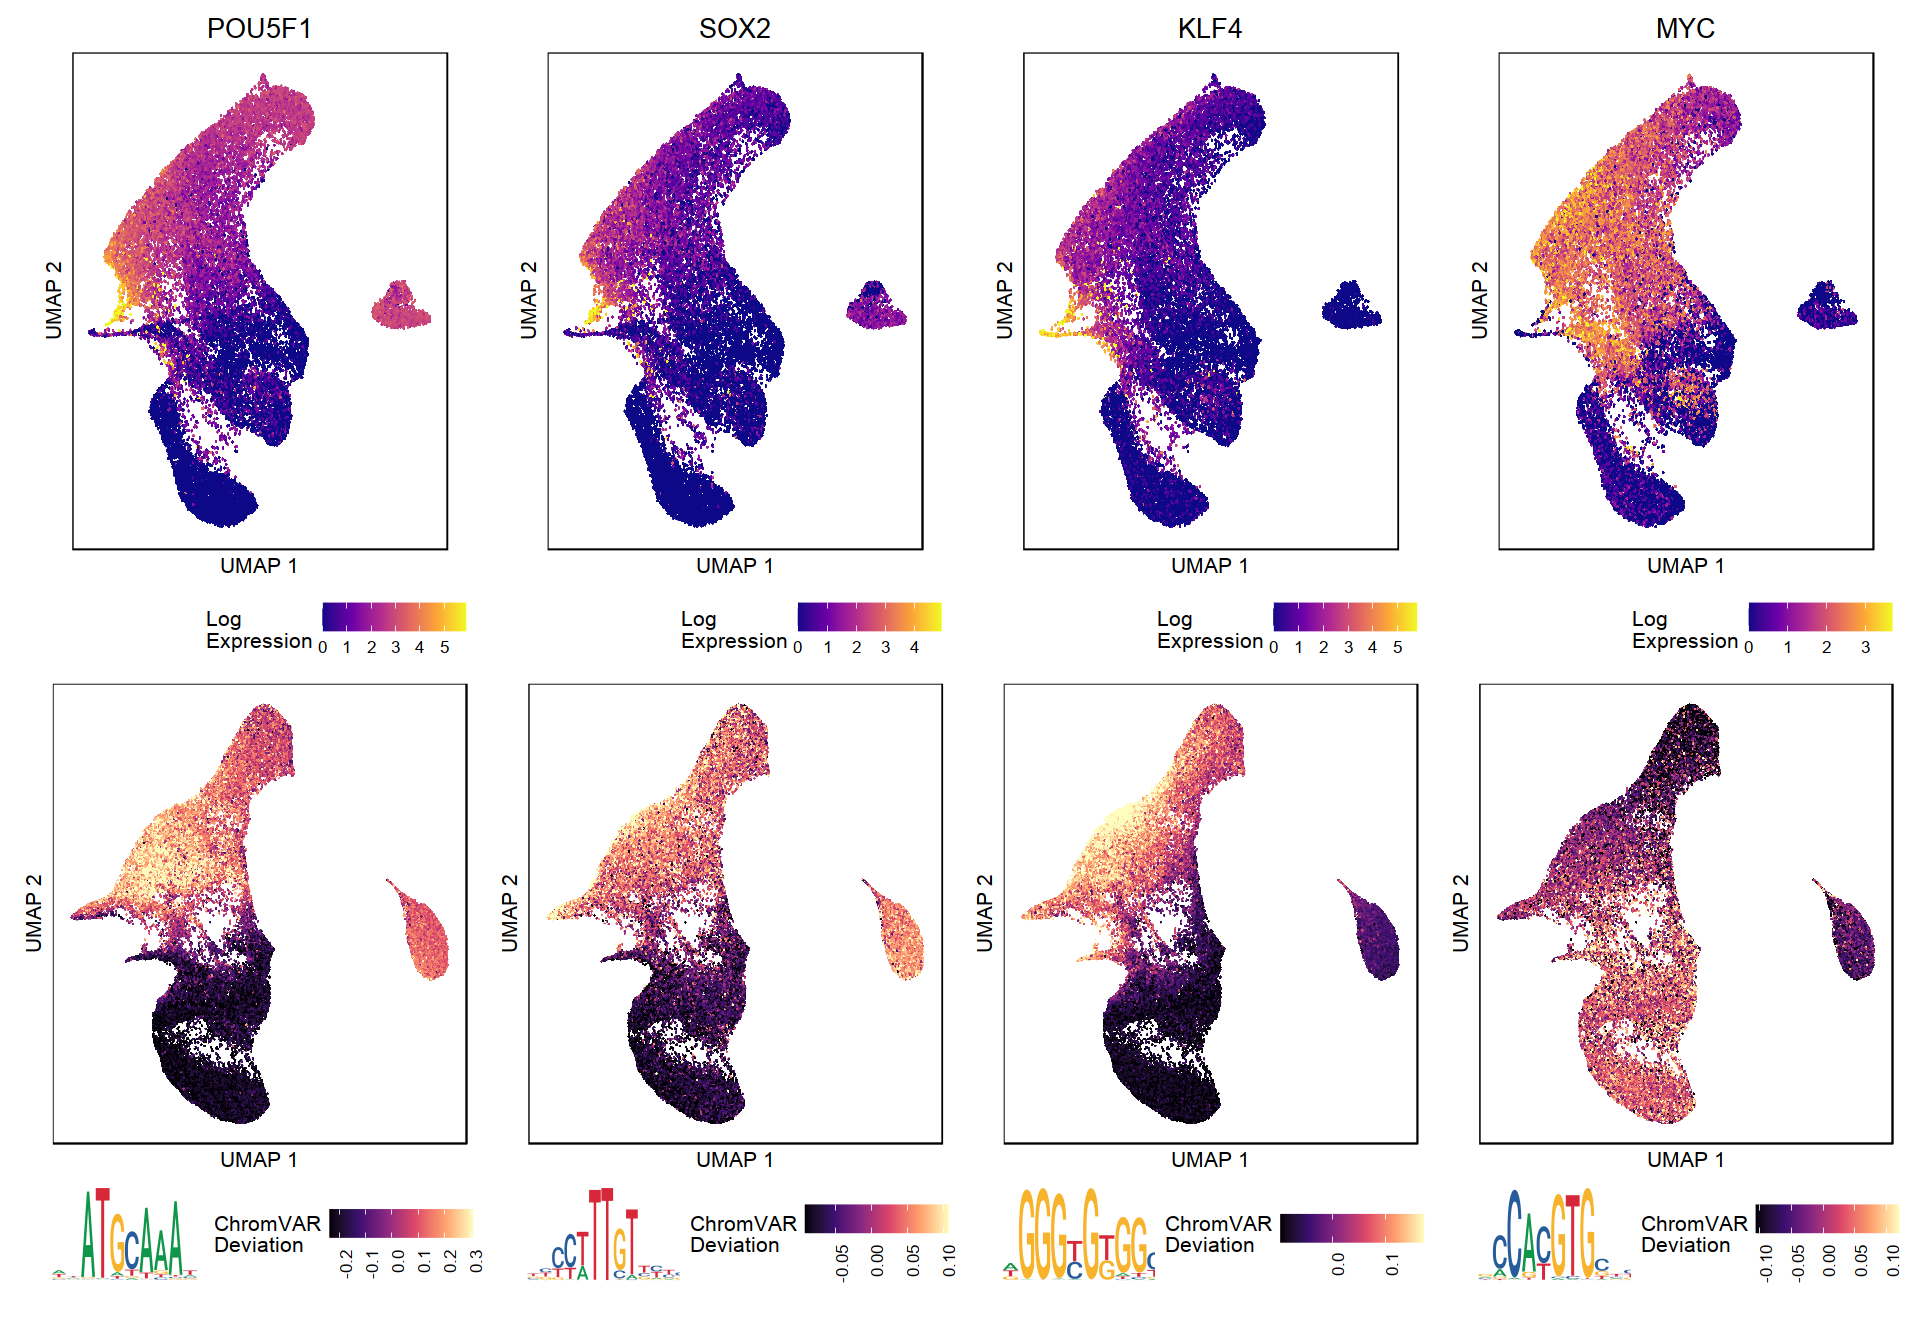

In [13]:
options(repr.plot.width = 16, repr.plot.height = 11)

row1_plot = wrap_plots(expr_cv)

row1_plot

In [15]:
ggsave(row1_plot, file="subfigs/expr_chromvar.pdf", height = 11, width=16, useDingbats=F)

---

In [16]:
sessionInfo()

R version 3.6.3 (2020-02-29)
Platform: x86_64-conda_cos6-linux-gnu (64-bit)
Running under: Ubuntu 18.04.5 LTS

Matrix products: default
BLAS/LAPACK: /users/surag/anaconda3/envs/r36_cran/lib/libopenblasp-r0.3.9.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] patchwork_1.0.0 ggplot2_3.3.3  

loaded via a namespace (and not attached):
 [1] magrittr_1.5      tidyselect_1.1.0  munsell_0.5.0     uuid_0.1-4       
 [5] colorspace_1.4-1  R6_2.4.1          rlang_0.4.11      dplyr_1.0.2      
 [9] tools_3.6.3       grid_3.6.3        gtable_0.3.0      ggseql